# Oscillators

In [1]:
%matplotlib ipympl
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, FloatRangeSlider, IntSlider, HBox, Layout, Output, VBox, HBox
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from RungeKutta import RK4

## Harmonic oscillator

$$
     \frac{\mathrm{d^2} x}{\mathrm{d} t^2}  + \omega^2x = 0
$$

In [2]:
# define grid and ODE
a, b, n = 0., 50., 1001
dt = (b-a)/(n-1)
ts = a + np.arange(n)*dt
f = lambda t, x, v, w, d, F0, wd: -w**2*x-d*v + F0*np.cos(wd*t)

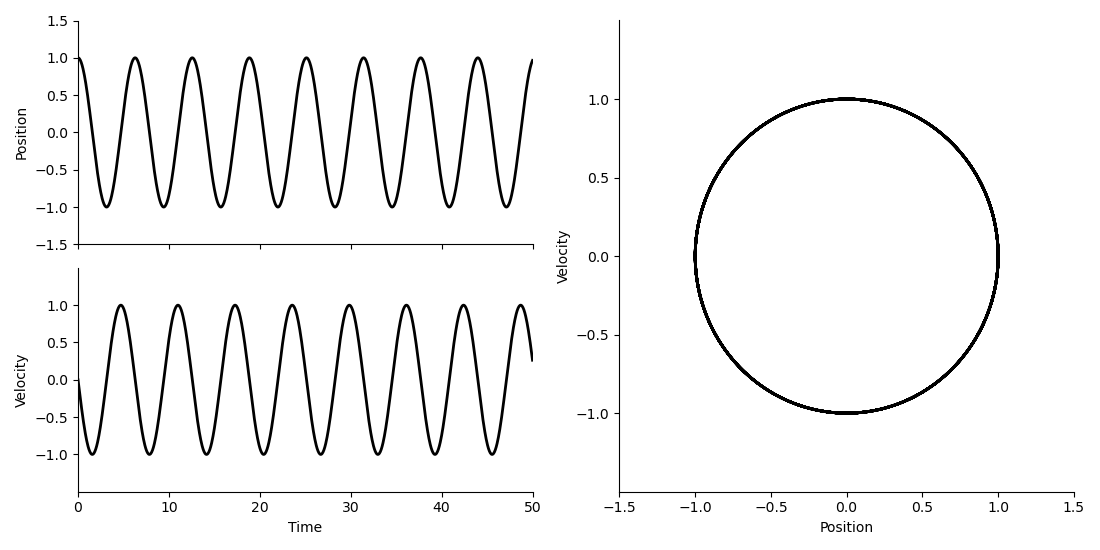

In [3]:
#Define plot
fig = plt.figure(figsize=(11,5.5), tight_layout=True)
gs = gridspec.GridSpec(2, 2)

# phase space plot
ax0 = fig.add_subplot(gs[:, 1])
line_vx, = ax0.plot([], [], 'k', lw=2)
ax0.set_xlabel('Position')
ax0.set_ylabel('Velocity')
# position plot
ax1 = fig.add_subplot(gs[0, 0])
line_x, = ax1.plot([],[], 'k', lw=2)
ax1.set_ylabel('Position')
# velocity plot
ax2 = fig.add_subplot(gs[1, 0])
line_v, = ax2.plot([], [], 'k', lw=2)
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')

# plot parameters
for ax in [ax1,ax2]:
    ax.label_outer()
    ax.set_xlim(a,b)
for ax in [ax0, ax1, ax2]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
#Define plot updater
def update(w, x0, v0, d, F0, wd):
    # solve for updated parameters
    xs, vs = RK4(f, x0, v0, w, ts, d, F0, wd)
    # update position plot
    y_max_x = max(xs)+0.5
    ax1.set_ylim(-y_max_x, y_max_x)
    line_x.set_data(ts, xs)
    # update velocity plot
    y_max_v = max(vs)+0.5
    ax2.set_ylim(-y_max_v, y_max_v)
    line_v.set_data(ts, vs)
    # update phase plot
    ax0.set_xlim(-y_max_x, y_max_x)
    ax0.set_ylim(-y_max_v, y_max_v)
    line_vx.set_data(xs, vs)
    # draw
    fig.canvas.draw_idle()
    return line_x, line_v, line_vx, 

# define widget controls
s1=widgets.FloatSlider(min=0.5,max=3.,step=0.1,value=1.,layout=Layout(width='500px'),description='$\omega$',style = {'description_width': 'initial'})
s2=widgets.FloatSlider(min=0.,max=3.,step=0.1,value=0.,layout=Layout(width='500px'),description='$\mu$',style = {'description_width': 'initial'})
s3=widgets.FloatSlider(min=0.,max=3.,step=0.1,value=0.,layout=Layout(width='500px'),description='$F_0$',style = {'description_width': 'initial'})
s4=widgets.FloatSlider(min=-2.,max=2.,step=0.1,value=1.,layout=Layout(width='500px'),description='$x_0$',style = {'description_width': 'initial'})
s5=widgets.FloatSlider(min=-2.,max=2.,step=0.1,value=0.,layout=Layout(width='500px'),description='$v_0$',style = {'description_width': 'initial'})
s6=widgets.FloatSlider(min=0.5,max=3.,step=0.1,value=1.,layout=Layout(width='500px'),description='$\omega_d$',style = {'description_width': 'initial'})
# connect controls to plot
out = interactive_output(update, {'w': s1, 'd': s2, 'F0': s3, 'x0': s4, 'v0': s5, 'wd': s6})
# set layout
Vbox_layout = Layout(display='flex', flex_flow='columns', justify_content='space-between', align_items='center')
# display output
display(VBox([s1, s2, s3, s4, s5, s6], layout=Vbox_layout))

## Anharmonic oscillator

$$
     \frac{\mathrm{d^2} x}{\mathrm{d} t^2}  + \omega^2x^3 = 0
$$

In [8]:
# define grid and ODE
a, b, n = 0., 50., 1001
dt = (b-a)/(n-1)
ts = a + np.arange(n)*dt
f = lambda t, x, v, w: -w**2*x**3

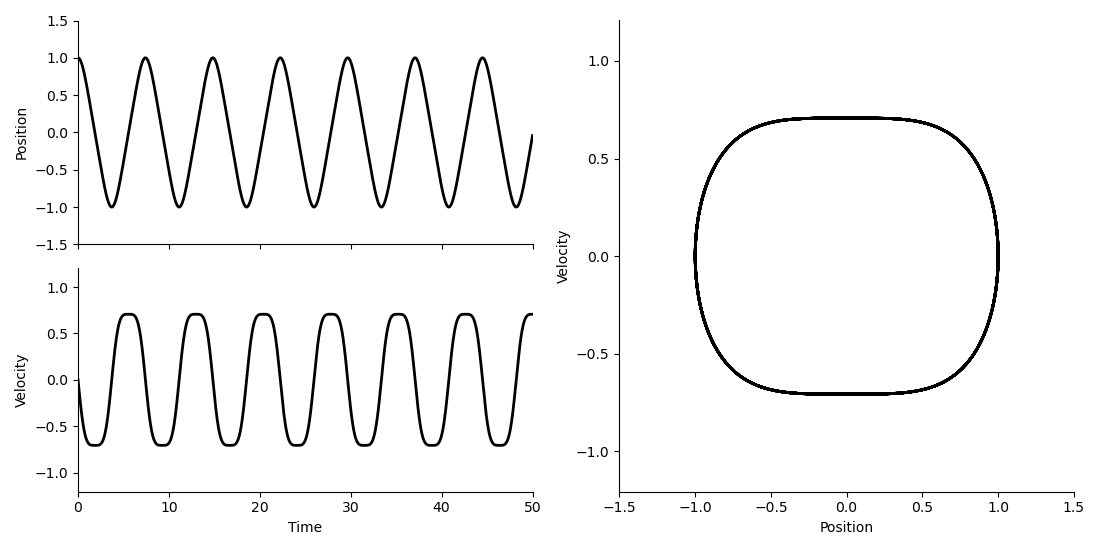

In [9]:
#Define plot
fig = plt.figure(figsize=(11,5.5), tight_layout=True)
gs = gridspec.GridSpec(2, 2)

# phase space plot
ax0 = fig.add_subplot(gs[:, 1])
line_vx, = ax0.plot([], [], 'k', lw=2)
ax0.set_xlabel('Position')
ax0.set_ylabel('Velocity')
# position plot
ax1 = fig.add_subplot(gs[0, 0])
line_x, = ax1.plot([],[], 'k', lw=2)
ax1.set_ylabel('Position')
# velocity plot
ax2 = fig.add_subplot(gs[1, 0])
line_v, = ax2.plot([], [], 'k', lw=2)
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')

# plot parameters
for ax in [ax1,ax2]:
    ax.label_outer()
    ax.set_xlim(a,b)
for ax in [ax0, ax1, ax2]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
#Define plot updater
def update(w, x0, v0):
    # solve for updated parameters
    xs, vs = RK4(f, x0, v0, w, ts)
    # update position plot
    y_max_x = max(xs)+ 0.5
    ax1.set_ylim(-y_max_x, y_max_x)
    line_x.set_data(ts, xs)
    # update velocity plot
    y_max_v = max(vs) + 0.5
    ax2.set_ylim(-y_max_v, y_max_v)
    line_v.set_data(ts, vs)
    # update phase plot
    ax0.set_xlim(-y_max_x, y_max_x)
    ax0.set_ylim(-y_max_v, y_max_v)
    line_vx.set_data(xs, vs)
    # draw
    fig.canvas.draw_idle()
    return line_x, line_v, line_vx, 

# define widget controls
s1=widgets.FloatSlider(min=0.5,max=3.,step=0.1,value=1.,layout=Layout(width='500px'),description='$\omega$',style = {'description_width': 'initial'})
s2=widgets.FloatSlider(min=-5.,max=5.,step=0.1,value=1.,layout=Layout(width='500px'),description='$x_0$',style = {'description_width': 'initial'})
s3=widgets.FloatSlider(min=-5.,max=5.,step=0.1,value=0.,layout=Layout(width='500px'),description='$v_0$',style = {'description_width': 'initial'})
# connect controls to plot
out = interactive_output(update, {'w': s1, 'x0': s2, 'v0': s3})
# set layout
Vbox_layout = Layout(display='flex', flex_flow='columns', justify_content='space-between', align_items='center')
# display output
display(VBox([s1, s2, s3], layout=Vbox_layout))

## Van der Pol Oscillator

$$
     \frac{\mathrm{d^2} x}{\mathrm{d} t^2}  -\mu(1-x^2) + \omega^2x^3 = 0
$$

In [6]:
# define grid and ODE
a, b, n = 0., 20., 1001
dt = (b-a)/(n-1)
ts = a + np.arange(n)*dt
f = lambda t, x, v, w, mu: mu*(1-x**2)*v-w**2*x

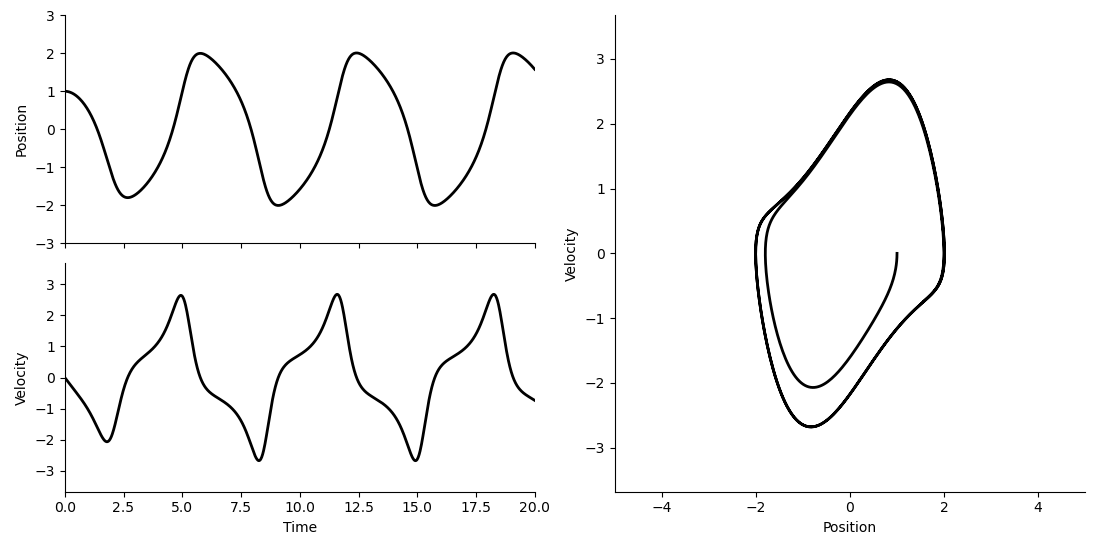

In [7]:
#Define plot
fig = plt.figure(figsize=(11,5.5), tight_layout=True)
gs = gridspec.GridSpec(2, 2)

# phase space plot
ax0 = fig.add_subplot(gs[:, 1])
line_vx, = ax0.plot([], [], 'k', lw=2)
ax0.set_xlabel('Position')
ax0.set_ylabel('Velocity')
# position plot
ax1 = fig.add_subplot(gs[0, 0])
line_x, = ax1.plot([],[], 'k', lw=2)
ax1.set_ylabel('Position')
# velocity plot
ax2 = fig.add_subplot(gs[1, 0])
line_v, = ax2.plot([], [], 'k', lw=2)
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')

# plot parameters
for ax in [ax1,ax2]:
    ax.label_outer()
    ax.set_xlim(a,b)
for ax in [ax0, ax1, ax2]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
#Define plot updater
def update(w, x0, v0, mu):
    # solve for updated parameters
    xs, vs = RK4(f, x0, v0, w, ts, mu)
    # update position plot
    y_max_x = max(xs)+ 1
    ax1.set_ylim(-y_max_x, y_max_x)
    line_x.set_data(ts, xs)
    # update velocity plot
    y_max_v = max(vs) + 1
    ax2.set_ylim(-y_max_v, y_max_v)
    line_v.set_data(ts, vs)
    # update phase plot
    ax0.set_xlim(-5, 5)
    ax0.set_ylim(-y_max_v, y_max_v)
    line_vx.set_data(xs, vs)
    # draw
    fig.canvas.draw_idle()
    return line_x, line_v, line_vx, 

# define widget controls
s1=widgets.FloatSlider(min=0.5,max=3.,step=0.1,value=1.,layout=Layout(width='500px'),description='$\omega$',style = {'description_width': 'initial'})
s2=widgets.FloatSlider(min=-5.,max=5.,step=0.1,value=1.,layout=Layout(width='500px'),description='$x_0$',style = {'description_width': 'initial'})
s3=widgets.FloatSlider(min=-5.,max=5.,step=0.1,value=0.,layout=Layout(width='500px'),description='$v_0$',style = {'description_width': 'initial'})
s4=widgets.FloatSlider(min=0.,max=4.,step=0.1,value=1.,layout=Layout(width='500px'),description='$\mu$',style = {'description_width': 'initial'})
# connect controls to plot
out = interactive_output(update, {'w': s1, 'x0': s2, 'v0': s3, 'mu': s4})
# set layout
Vbox_layout = Layout(display='flex', flex_flow='columns', justify_content='space-between', align_items='center')
# display output
display(VBox([s1, s2, s3, s4], layout=Vbox_layout))